## Final Project Submission

Please fill out:
* Student name: Jose J. Villalobos
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: 


## Mod 3 Final Project (Classification Model)

For this project we were tasked with choosing a dataset and building a classification model using what we have learned about Data Science and Machine Learning. My favorite sport is Baseball so I decided to go with data containing statistics about the different pitchers in the MLB(Major League Baseball). Over the years the game has changed, teams nowadays are using stats and data analysis to make decisions about building a team to win the coveted WORLD SERIES! With that in mind, the focus here will be on predicting the performance of the pitchers in order to aid the Front Office make decisions about who to acquire for the following season. The dataset used can be found at http://www.seanlahman.com/baseball-archive/statistics/.  

In order to accomplish this my model will classify pitchers as (1) Great, (2) Average, and (3) Bad. The dataset contains information about pitchers since the beginning of the game back in 1871, but I will only be working with stats from the last eleven years. These stats will be the predicting features that will be included into my model as well as a way to label each of the different data points. A list of features and their descriptions are included in this repository. 

The framework will follow the **OSEMN** process:
1. Obtain
2. Scrub
3. Explore
4. Model
5. Interpret


### 1. Obtain

Here I will load any libraries that I need for the time being and the data that is going to be used.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

In [2]:
# Loading data from the repository
raw_pitching = pd.read_csv("Pitching.csv")
raw_pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [5]:
# Subsetting data to only include stats from 2008 to 2019
pitching = raw_pitching[(raw_pitching.yearID >= 2008) & (raw_pitching.yearID <= 2019)]

display(pitching.head())

print(pitching.shape)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
38320,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
38321,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
38322,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
38323,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
38324,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


(9307, 30)


### 2. Scrub
Now that I have obtained my raw data I will proceed with the scrubbing phase.

In [6]:
# Check for missing values and their percentages
null_vals = pitching.isna().sum()
print("Percent of missing data: \n\n", null_vals / len(pitching))

Percent of missing data: 

 playerID    0.000000
yearID      0.000000
stint       0.000000
teamID      0.000000
lgID        0.000000
W           0.000000
L           0.000000
G           0.000000
GS          0.000000
CG          0.000000
SHO         0.000000
SV          0.000000
IPouts      0.000000
H           0.000000
ER          0.000000
HR          0.000000
BB          0.000000
SO          0.000000
BAOpp       0.000645
ERA         0.001289
IBB         0.000000
WP          0.000000
HBP         0.000000
BK          0.000000
BFP         0.000000
GF          0.000000
R           0.000000
SH          0.000000
SF          0.000000
GIDP        0.000000
dtype: float64


Since there is only a very small amount of missing values, dropping them from the data set is the way to go.

In [7]:
pitching.dropna(inplace = True)

In [8]:
pitching.isna().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
W           0
L           0
G           0
GS          0
CG          0
SHO         0
SV          0
IPouts      0
H           0
ER          0
HR          0
BB          0
SO          0
BAOpp       0
ERA         0
IBB         0
WP          0
HBP         0
BK          0
BFP         0
GF          0
R           0
SH          0
SF          0
GIDP        0
dtype: int64

In [9]:
# Descriptive statistics of my data
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000,9294.000000
mean,2013.816979,1.090273,3.136862,3.136647,25.477943,6.273940,0.142995,0.064665,1.591887,168.162363,54.627824,25.662040,6.654508,19.762105,48.031849,0.266253,5.348883,1.348074,2.193781,2.148483,0.194857,239.252206,6.130514,27.781149,1.649021,1.616419,4.740585
std,3.488551,0.300876,4.033033,3.557350,20.792382,10.398705,0.587813,0.315007,6.193472,170.748939,55.362188,25.337357,7.145546,18.543178,50.462570,0.080850,6.163295,1.691821,2.639908,2.607200,0.511581,238.182038,10.150894,27.378007,2.332177,1.931896,5.493464
min,2008.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,39.000000,14.000000,7.000000,2.000000,6.000000,10.000000,0.228000,3.180000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,8.000000,0.000000,0.000000,1.000000
50%,2014.000000,1.000000,2.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,113.000000,36.000000,17.000000,4.000000,14.000000,31.000000,0.259000,4.260000,1.000000,1.000000,1.000000,0.000000,163.000000,2.000000,19.000000,1.000000,1.000000,3.000000
75%,2017.000000,1.000000,4.000000,5.000000,34.000000,9.000000,0.000000,0.000000,0.000000,215.000000,69.000000,34.000000,9.000000,28.000000,68.000000,0.295000,5.800000,2.000000,3.000000,3.000000,0.000000,303.000000,8.000000,36.000000,2.000000,2.000000,7.000000
max,2019.000000,5.000000,24.000000,19.000000,92.000000,35.000000,11.000000,6.000000,62.000000,753.000000,262.000000,119.000000,46.000000,105.000000,326.000000,1.000000,162.000000,13.000000,25.000000,19.000000,6.000000,1001.000000,71.000000,128.000000,19.000000,14.000000,36.000000


Looks like I am working with some pretty normal data without any extreme outliers. Some of these features will not be included in my model building because they have no real effect on how a pitcher will perform. For example **"IBB"**, which means Intentional Walks, is usually a strategy used by teams to skip pitching to a hot hitter. A pitcher cannot increase or decrease this to improve his performance. 

Some features might impact the model more than others, a remedy for this would be to normalize the data to a scale of 0 to 1.

In [10]:
# Taking a copy of the raw data to manipulate
pitch_data = pitching.copy()
pitch_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
38320,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
38321,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
38322,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
38323,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
38324,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


In [11]:
pitch_data.reset_index(drop = True, inplace = True)
pitch_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0


In [12]:
# Here I will load this dataset in order to obtain some personal info about the pitchers.
players = pd.read_csv("People.csv")
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [13]:
players["fullName"] = players["nameFirst"] + " " + players["nameLast"]
players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,Hank Aaron
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,Tommie Aaron
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,Don Aase
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,Andy Abad


In [14]:
pitch_data_2 = pd.merge(pitch_data, players, on='playerID', how='left')
pitch_data_2.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,...,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,...,4.0,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,...,3.0,1981.0,12.0,18.0,USA,AZ,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,Jeremy,Accardo,Jeremiah Lee,195.0,72.0,R,R,2005-05-04,2012-09-27,accaj001,accarje01,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,...,3.0,1982.0,12.0,8.0,Mexico,Sonora,San Luis Rio Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Alfredo,Aceves,Alfredo,205.0,74.0,R,R,2008-08-31,2014-06-02,aceva001,aceveal01,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,...,7.0,1981.0,5.0,1.0,Panama,Colon,Colon,NaN,NaN,NaN,NaN,NaN,NaN,Manny,Acosta,Manuel Alcides,215.0,76.0,R,R,2007-08-12,2012-10-03,acosm001,acostma01,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,...,2.0,1978.0,7.0,29.0,USA,TX,Corpus Christi,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Adams,Jon Michael,210.0,77.0,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,Mike Adams


In [15]:
# Here I will start to drop the columns I will not be using
pitch_data_3 = pitch_data_2.drop(pitch_data_2.iloc[:, 30:45], axis = 1)
pitch_data_3.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,0.300,6.57,2.0,1,1.0,0,56.0,6,10,0.0,1.0,3.0,195.0,72.0,R,R,2005-05-04,2012-09-27,accaj001,accarje01,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,0.227,2.40,0.0,1,0.0,0,120.0,1,8,0.0,0.0,3.0,205.0,74.0,R,R,2008-08-31,2014-06-02,aceva001,aceveal01,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,0.247,3.57,5.0,5,1.0,0,226.0,22,25,4.0,1.0,7.0,215.0,76.0,R,R,2007-08-12,2012-10-03,acosm001,acostma01,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,0.209,2.48,2.0,0,0.0,0,259.0,11,18,2.0,3.0,2.0,210.0,77.0,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,Mike Adams


In [16]:
cols = ["BAOpp", "IBB", "WP", "HBP", "BK", "BFP", "SH", "SF", "GIDP", "bats",
        "debut", "finalGame", "retroID", "bbrefID"]
pitch_data_3.drop(columns = cols, axis = 1, inplace = True)
pitch_data_3.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams


The **"IPouts"** feature describes the amount of outs the player has pitched. It takes the amount of Innings pitched and multiplies it by 3(outs in an inning). This is not as useful as the amount of Innings a player has pitched.

In [17]:
# Creating a new feature to give me the amount of innings pitched
pitch_data_3["IP"] = pitch_data_3.apply(lambda row: round(row.IPouts / 3, 2), axis = 1)
pitch_data_3.head(20)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33
5,adenhni01,2008,1,LAA,AL,1,0,3,3,0,0,0,36,18,12,0,13,4,9.00,0,12,185.0,75.0,R,Nick Adenhart,12.00
6,adkinjo01,2008,1,CIN,NL,1,0,4,0,0,0,0,11,4,1,1,3,3,2.45,0,1,200.0,72.0,R,Jon Adkins,3.67
7,affelje01,2008,1,CIN,NL,1,1,74,0,0,0,0,235,78,29,9,25,80,3.33,20,36,225.0,76.0,L,Jeremy Affeldt,78.33
8,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,41,15,6,1,6,13,3.95,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67
9,alberma01,2008,1,BAL,AL,3,3,28,3,0,0,0,147,43,19,4,22,26,3.49,5,21,225.0,73.0,R,Matt Albers,49.00


In [18]:
# Looking for missing values and types of data
pitch_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9294 entries, 0 to 9293
Data columns (total 26 columns):
playerID    9294 non-null object
yearID      9294 non-null int64
stint       9294 non-null int64
teamID      9294 non-null object
lgID        9294 non-null object
W           9294 non-null int64
L           9294 non-null int64
G           9294 non-null int64
GS          9294 non-null int64
CG          9294 non-null int64
SHO         9294 non-null int64
SV          9294 non-null int64
IPouts      9294 non-null int64
H           9294 non-null int64
ER          9294 non-null int64
HR          9294 non-null int64
BB          9294 non-null int64
SO          9294 non-null int64
ERA         9294 non-null float64
GF          9294 non-null int64
R           9294 non-null int64
weight      9294 non-null float64
height      9294 non-null float64
throws      9294 non-null object
fullName    9294 non-null object
IP          9294 non-null float64
dtypes: float64(4), int64(17), object(5)
memory 

Teams have deep pitching rosters so occasionally you will have a pitcher that doesn't see much action. With this in mind I will drop any pitchers that have been in 1 or less innings. 

In [19]:
# Dropping pitchers with 1 or less IP
IP_lessThan_1 = pitch_data_3.loc[pitch_data_3.IP <= 1]
IP_lessThan_1.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
89,burkeja02,2008,1,SEA,AL,0,1,1,0,0,0,0,3,1,1,0,0,0,9.0,1,1,195.0,72.0,R,Jamie Burke,1.0
110,carpean01,2008,1,PHI,NL,0,0,1,0,0,0,0,3,1,0,0,1,1,0.0,1,0,240.0,75.0,R,Drew Carpenter,1.0
156,diazjo01,2008,1,TEX,AL,0,0,1,0,0,0,0,3,1,0,0,1,2,0.0,1,1,230.0,72.0,R,Jose Diaz,1.0
407,milesaa01,2008,1,SLN,NL,0,0,1,0,0,0,0,3,0,0,0,0,0,0.0,1,0,180.0,68.0,R,Aaron Miles,1.0
418,morilju01,2008,1,COL,NL,0,0,1,0,0,0,0,3,1,0,0,0,0,0.0,1,0,190.0,73.0,R,Juan Morillo,1.0


In [20]:
pitch_data_3.drop(IP_lessThan_1.index, inplace = True)
pitch_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8975 entries, 0 to 9292
Data columns (total 26 columns):
playerID    8975 non-null object
yearID      8975 non-null int64
stint       8975 non-null int64
teamID      8975 non-null object
lgID        8975 non-null object
W           8975 non-null int64
L           8975 non-null int64
G           8975 non-null int64
GS          8975 non-null int64
CG          8975 non-null int64
SHO         8975 non-null int64
SV          8975 non-null int64
IPouts      8975 non-null int64
H           8975 non-null int64
ER          8975 non-null int64
HR          8975 non-null int64
BB          8975 non-null int64
SO          8975 non-null int64
ERA         8975 non-null float64
GF          8975 non-null int64
R           8975 non-null int64
weight      8975 non-null float64
height      8975 non-null float64
throws      8975 non-null object
fullName    8975 non-null object
IP          8975 non-null float64
dtypes: float64(4), int64(17), object(5)
memory 

Trades are another key factor in Baseball, the trade deadline is almost always the 31st of July. This is the last chance for a team to make some moves before finishing the regular season. The **"stint"** feature gives this info about the pitcher, 1 = one team and 2 = two teams and so on. If a player has more than 2 stints he probably isn't very good. This is why I will only use pitchers who have a max of 2 stints in the season. 

In [21]:
# Slicing data to separate the 2 stint pitchers from the 1 stint pitchers
multi_stint_df = pitch_data_3[pitch_data_3["stint"] == 2]
multi_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
12,ariasal02,2008,2,HOU,NL,1,1,3,2,0,0,0,24,11,6,0,6,8,6.75,0,6,155.0,71.0,R,Alberto Arias,8.00
18,ayalalu01,2008,2,NYN,NL,1,2,19,0,0,0,9,54,23,11,3,2,14,5.50,13,12,205.0,74.0,R,Luis Ayala,18.00
22,baekch01,2008,2,SDN,NL,6,9,22,20,0,0,0,333,118,57,12,30,77,4.62,0,60,190.0,76.0,R,Cha-Seung Baek,111.00
32,bassbr01,2008,2,BAL,AL,1,0,5,4,0,0,0,63,14,11,1,9,13,4.71,0,13,215.0,74.0,R,Brian Bass,21.00
36,bautide01,2008,2,PIT,NL,4,3,35,0,0,0,0,124,46,28,5,28,34,6.10,5,28,190.0,77.0,R,Denny Bautista,41.33


In [22]:
single_stint_df = pitch_data_3[pitch_data_3["stint"] == 1]
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33


In [23]:
single_stint_df.reset_index(drop = True, inplace= True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,5.55,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,37,15,9,1,4,5,6.57,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,90,25,8,4,10,16,2.40,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,159,48,21,7,26,31,3.57,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,196,49,18,7,19,74,2.48,11,18,210.0,77.0,R,Mike Adams,65.33


In [24]:
multi_stint_df.reset_index(drop = True, inplace = True) 
multi_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
0,ariasal02,2008,2,HOU,NL,1,1,3,2,0,0,0,24,11,6,0,6,8,6.75,0,6,155.0,71.0,R,Alberto Arias,8.00
1,ayalalu01,2008,2,NYN,NL,1,2,19,0,0,0,9,54,23,11,3,2,14,5.50,13,12,205.0,74.0,R,Luis Ayala,18.00
2,baekch01,2008,2,SDN,NL,6,9,22,20,0,0,0,333,118,57,12,30,77,4.62,0,60,190.0,76.0,R,Cha-Seung Baek,111.00
3,bassbr01,2008,2,BAL,AL,1,0,5,4,0,0,0,63,14,11,1,9,13,4.71,0,13,215.0,74.0,R,Brian Bass,21.00
4,bautide01,2008,2,PIT,NL,4,3,35,0,0,0,0,124,46,28,5,28,34,6.10,5,28,190.0,77.0,R,Denny Bautista,41.33


In [28]:
# Due to some issues with the for loop used below, these indexes were dropped from the dataframe
# stint_drop_idx = [46, 202, 223, 311, 324, 349, 391, 404, 408, 471,
#                   536, 558, 566, 574, 579, 653, 660]

In [29]:
# multi_stint_df = multi_stint_df.drop(stint_drop_idx)

In [30]:
# This is a dataframe with every player from 2008 - 2019, with their cumulative stats. Might be good for later use.

# df = pd.concat([single_stint_df, multi_stint_df]).groupby(["playerID"])["W", "L"
#                                                                       , "G", "GS",
#                                                                       "CG", "SHO",
#                                                                       "SV", "IPouts",
#                                                                       "H", "ER", "HR",
#                                                                       "BB", "SO", "GF",
#                                                                       "R", "IP"].sum().reset_index()
# df

In order to ready the data for modeling, the following for_loop was used to add the stats from stint 1 and stint 2 to the pitchers that fulfilled the condition set and updates "single_stint_df" with complete stats for the season. It updates per feature so it has to be changed manually after every update.

In [60]:
for _,row in multi_stint_df.iterrows():
    s = single_stint_df.loc[(single_stint_df.playerID == row.playerID) & (single_stint_df.yearID == row.yearID)]
    #if row.playerID == s.playerID & s.yearID == row.yearID:
    #print("hello")
        #single_stint_df_row = single_stint_df.loc[(single_stint_df.playerID == row.playerID) & (single_stint_df.yearID == row.yearID)]
#print("Multi Stint ID: ", row.playerID)
#print("Single Stint ID: ", s.index)
    idx = s.index.values.astype('int')[0]
    val = single_stint_df.iloc[idx].IP + row.IP
    single_stint_df.iloc[idx, single_stint_df.columns.get_loc('IP')] = val

In [61]:
# Check to see if stats were added
single_stint_df.loc[single_stint_df.playerID == "ayalalu01"]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,GF,R,weight,height,throws,fullName,IP
16,ayalalu01,2008,1,WAS,NL,2,10,81,0,0,0,9,173,86,48,9,24,50,5.77,25,53,205.0,74.0,R,Luis Ayala,75.67
660,ayalalu01,2009,1,MIN,AL,1,5,38,0,0,0,0,97,50,25,5,14,28,4.18,13,28,205.0,74.0,R,Luis Ayala,40.00
1930,ayalalu01,2011,1,NYA,AL,2,2,52,0,0,0,0,168,51,13,5,20,39,2.09,20,17,205.0,74.0,R,Luis Ayala,56.00
2583,ayalalu01,2012,1,BAL,AL,5,5,66,0,0,0,1,225,81,22,7,14,51,2.64,15,27,205.0,74.0,R,Luis Ayala,75.00
3222,ayalalu01,2013,1,BAL,AL,2,1,39,0,0,0,0,6,38,12,2,13,22,9.00,7,12,205.0,74.0,R,Luis Ayala,33.00


In [62]:
# Drop ERA in order to recalculate for true ERA.
# Drop IPouts, no longer needed
single_stint_df.drop(columns = ["ERA", "IPouts"], inplace = True)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33


In [63]:
# Calculation of "ERA"(estimated runs allowed). Statistic used to measure how well a
# pitcher keeps the other team from scoring. The lower the better.

# Formula: 9 innings * "ER"(Earned Runs) / "IP"(innings pitched)
single_stint_df["ERA"] = single_stint_df.apply(lambda row: round((9 * row.ER) / row.IP, 2), axis = 1)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48


There are a few stats that can be used to evaluate a pitcher's performance, such as ERA(estimated runs allowed) and ERA+ which includes the ballpark in its calculation. For me a pitcher's performance can be measured by the way he does his primary job, keeping hitters off the bases. The following cell calculates WHIP(walks and hits per inning pitched), this reflects a pitcher's propensity to let a hitter reach the bases. The lower it is, the better the performance.

In [64]:
# Calculation of WHIP stat. Used as an evaluative statistic on how well a 
# pitcher keeps runners off the bases. Less is better.

# Formula "BB"(walks) + "H"(hits) / "IP"(innings pitched)
single_stint_df["WHIP"] = single_stint_df.apply(lambda row: round((row.BB + row.H) / row.IP, 2), axis = 1)
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04


Now I can label each of the data points using the WHIP stat.

In [65]:
# Labeling data, classifying the pitchers into three classes: 1 = Great, 2 = Average, 3 = Bad
for label, row in single_stint_df.iterrows():
    if row.WHIP < 1.25:
        single_stint_df.loc[label, "CLASS"] = 1
    if (row.WHIP >= 1.25) & (row.WHIP <= 1.39):
        single_stint_df.loc[label, "CLASS"] = 2
    elif row.WHIP >= 1.40:
        single_stint_df.loc[label, "CLASS"] = 3
        

In [66]:
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


In [67]:
# Checking distribution of classes
single_stint_df["CLASS"].value_counts(normalize = True)

3.0    0.478585
1.0    0.301769
2.0    0.219646
Name: CLASS, dtype: float64

In [68]:
# Saving the dataframe into csv to avoid running the above cells when reopening notebook
single_stint_df.to_csv("single_stint_df.csv", index = False)

In [121]:
# pitch_data_with_names[pitch_data_with_names.stint.isin(stint_count.index[stint_count.gt(2)])]

In [122]:
# pitch_data_2.groupby("stint").filter(lambda x: len(x) > 2)

In [123]:
# pitch_data_with_names[pitch_data_with_names.stint.isin(stint_count[stint_count > 2].index)]

### 3. Explore
Here we will try to visualize the data and gain insight.

In [59]:
# Loading data once again
single_stint_df = pd.read_csv("single_stint_df.csv")
display(single_stint_df.head())

print(single_stint_df.shape)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,R,David Aardsma,48.67,5.55,1.73,3.0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,R,Jeremy Accardo,12.33,6.57,1.54,3.0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,R,Manny Acosta,53.00,3.57,1.40,3.0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,R,Mike Adams,65.33,2.48,1.04,1.0


(8195, 27)


I will take a look at the pitchers of some of the best teams in the MLB and see how the stats relate to our classes.

In [60]:
teams = ["LAN", "MIL", "WAS", "NYA", "OAK", "HOU"]
best_teams = single_stint_df[single_stint_df["teamID"].isin(teams)].reset_index(drop = True)
best_teams.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,R,Alfredo Aceves,30.00,2.40,1.17,1.0
1,albaljo01,2008,1,NYA,AL,0,1,7,0,0,0,0,15,6,1,6,13,2,6,270.0,77.0,R,Jonathan Albaladejo,13.67,3.95,1.54,3.0
2,ayalalu01,2008,1,WAS,NL,2,10,81,0,0,0,9,86,48,9,24,50,25,53,205.0,74.0,R,Luis Ayala,75.67,5.71,1.45,3.0
3,backebr01,2008,1,HOU,NL,9,14,31,31,0,0,0,202,112,36,77,127,0,114,182.0,72.0,R,Brandon Backe,166.67,6.05,1.67,3.0
4,balesco01,2008,1,WAS,NL,3,7,15,15,0,0,0,92,49,12,28,50,0,53,190.0,76.0,R,Collin Balester,80.00,5.51,1.50,3.0


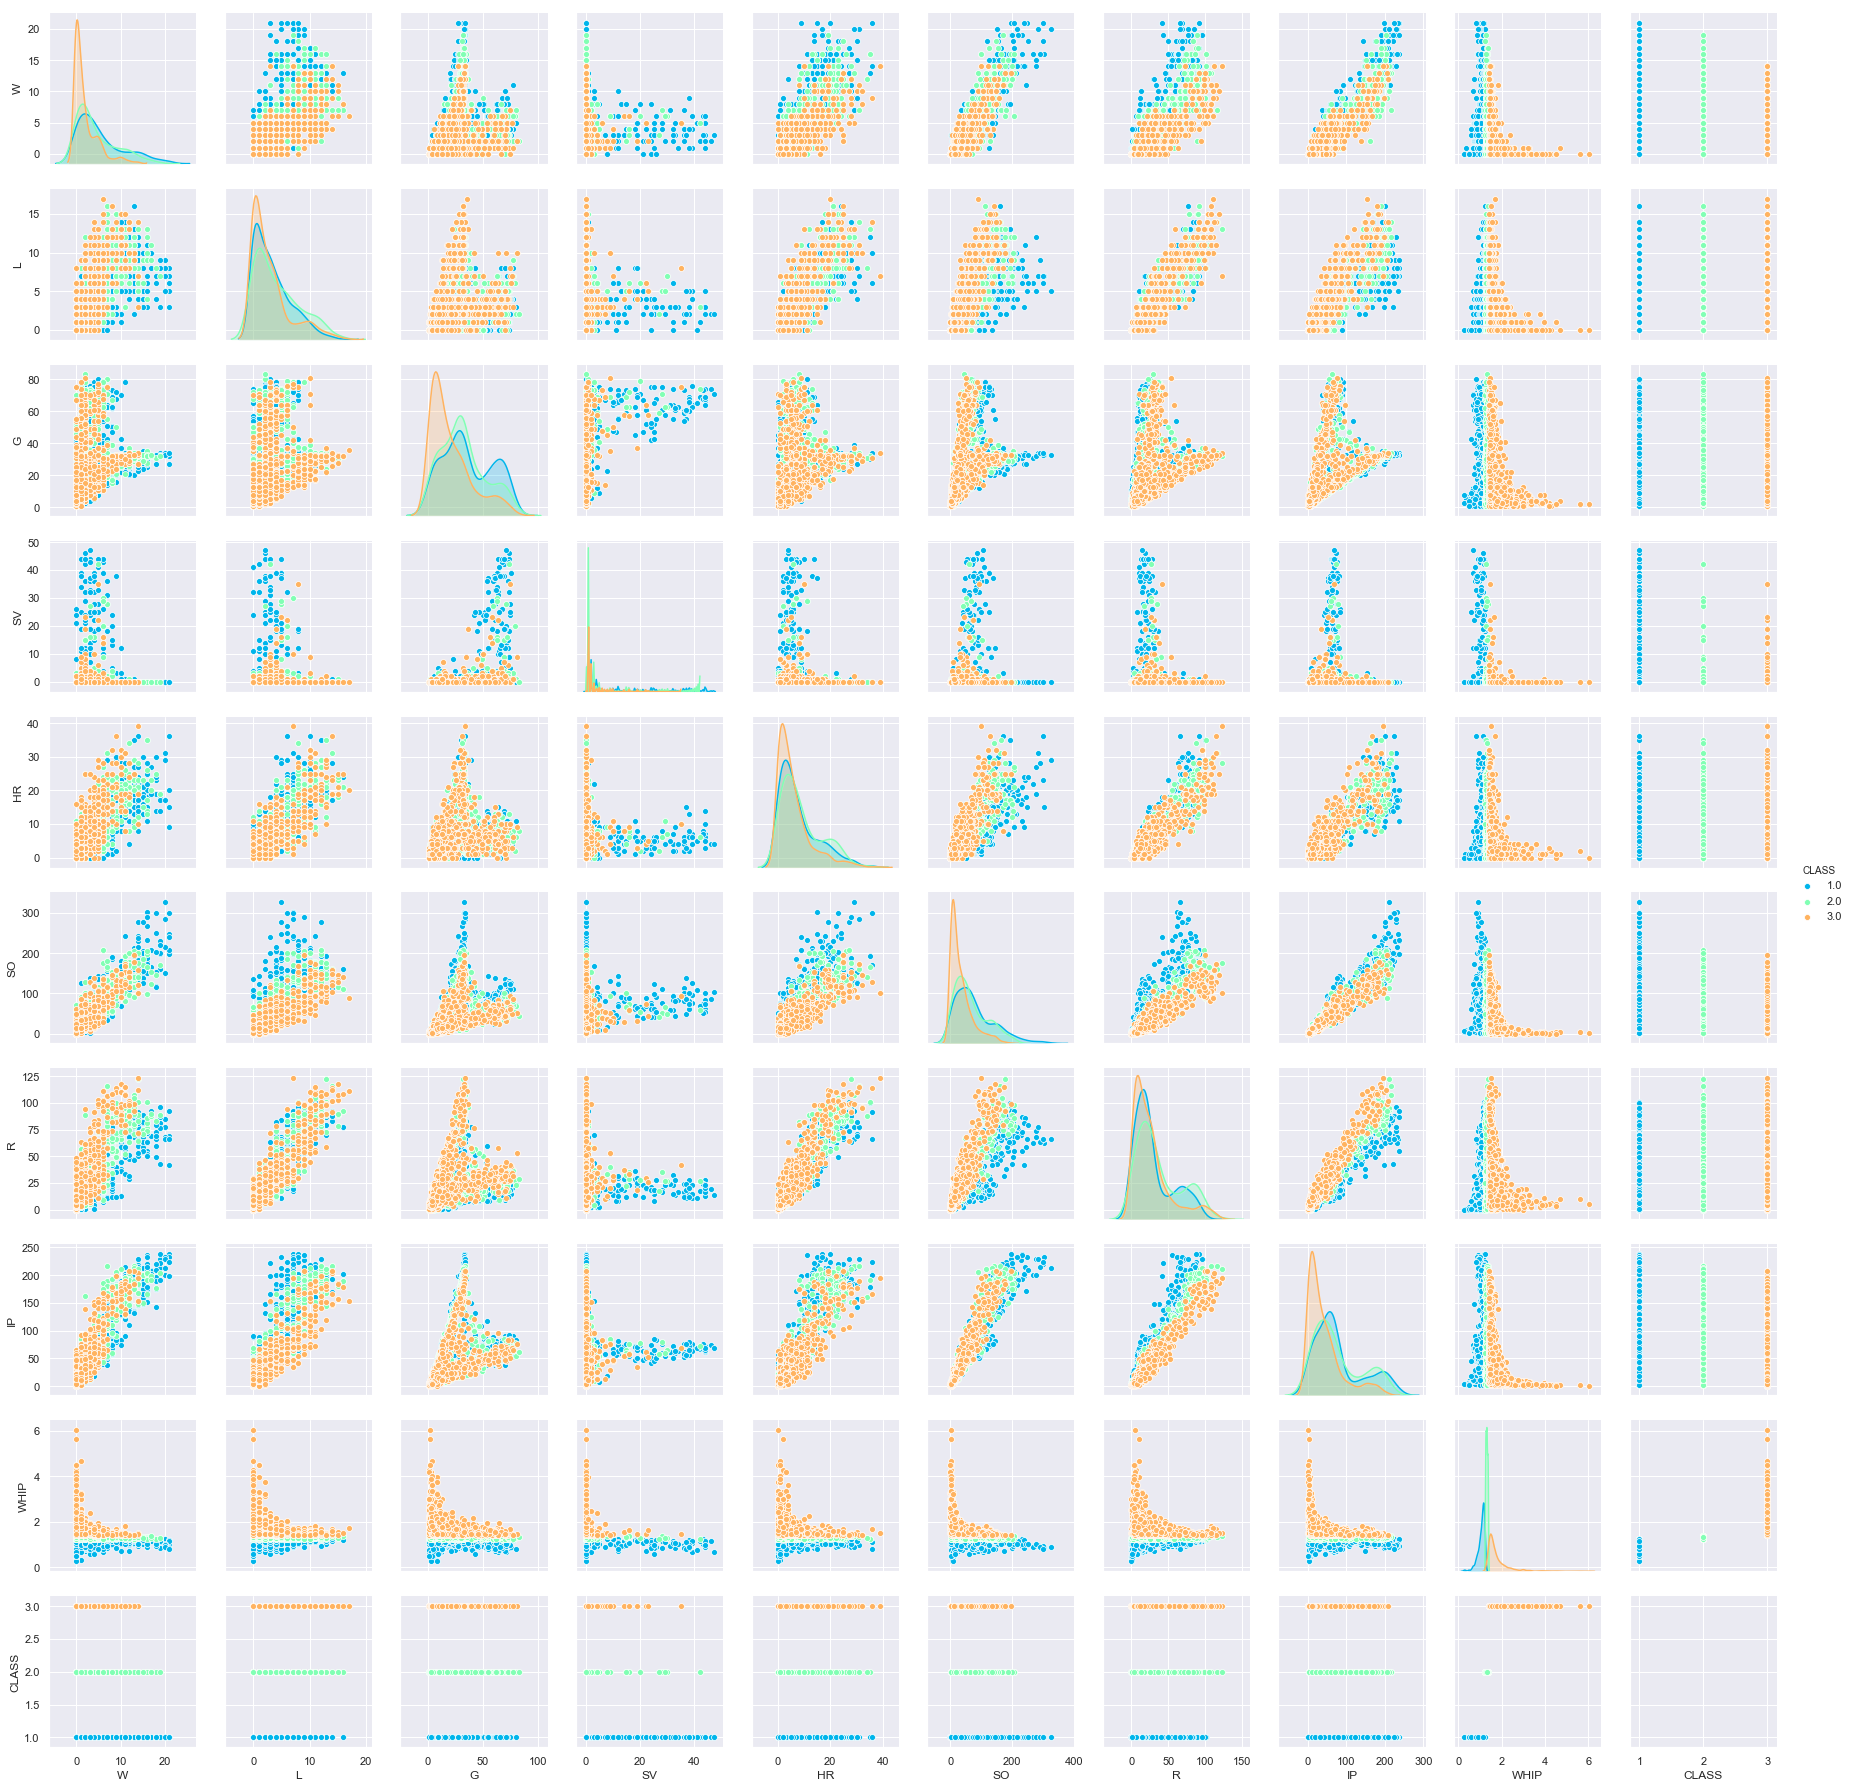

In [64]:
# Numerical data and how it relates to our class labels.
sns.pairplot(best_teams[["W", "L", "G", "SV", "HR", "SO",
                         "R", "IP", "WHIP", "CLASS"]],
             hue = 'CLASS', palette = "rainbow")

plt.show()

Looking at the pairplot above we can see that "WHIP" will have to be dropped prior to modeling since it was used to label the data, this will make sure that model is heavily impacted by this feature. I can also tell that the **"SO"**(strikeouts)
feature will be important to the prediction. The more strikeouts a pitcher has the better he performs. Interestingly enough, you do not have to be a starting pitcher to perform well. The **"SV"**(saved games) features tell us that a pitcher that can fix a prior pitcher's mess is a good performer.

In [65]:
# Comparing two left handed and two right handed pitchers.
pitchers = ["kershcl01", "cahiltr01", "sabatcc01", "verlaju01"]
player_perform = single_stint_df[single_stint_df["playerID"].isin(pitchers)].reset_index(drop = True)
player_perform.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,throws,fullName,IP,ERA,WHIP,CLASS
0,kershcl01,2008,1,LAN,NL,5,5,22,21,0,0,0,109,51,11,52,100,0,51,226.0,76.0,L,Clayton Kershaw,107.67,4.26,1.50,3.0
1,sabatcc01,2008,1,CLE,AL,17,10,35,35,10,5,0,223,76,19,59,251,0,85,300.0,78.0,L,CC Sabathia,253.00,2.70,1.11,1.0
2,verlaju01,2008,1,DET,AL,11,17,33,33,1,0,0,195,108,18,87,163,0,119,225.0,77.0,R,Justin Verlander,201.00,4.84,1.40,3.0
3,cahiltr01,2009,1,OAK,AL,10,13,32,32,0,0,0,185,92,27,72,90,0,99,230.0,76.0,R,Trevor Cahill,178.67,4.63,1.44,3.0
4,kershcl01,2009,1,LAN,NL,8,8,31,30,0,0,0,119,53,7,91,185,1,55,226.0,76.0,L,Clayton Kershaw,171.00,2.79,1.23,1.0


I chose these pitchers because their careers span over the length of 11 years, which are the years of data that I am using to build the model, not to mention that two of them are some of the best there is. This plot shows their individual performance over the years and how stikeouts relate.

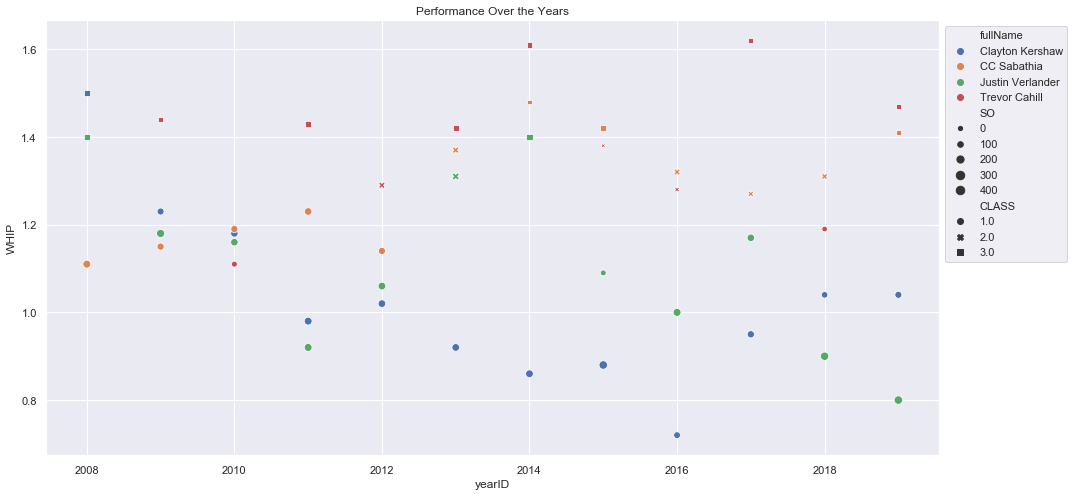

In [67]:
# Plot to show pitchers performance over the years.
plt.figure(figsize = (16, 8))
sns.scatterplot(x = "yearID", y = "WHIP", data = player_perform,
                hue = "fullName", size = "SO", style = "CLASS")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Performance Over the Years", fontdict={"fontsize":12})
plt.show()

We can see that a pitchers career usually starts in the higher WHIP ranges of 1.40 and above. For Clayton K.(blue) and Justin V.(green) their careers are almost parallel with each other until 2013, where Justin had one average season and one bad season with under 200 strikeouts. 

Clayton K. on the other hand continued his improved performance up to the end of 2016, then a slight increase in his WHIP that has plateaued at 2019, with his strikeouts maintaining in the 200 to 300 range.  

Now for CC(orange). CC has been in the league for almost twenty years, debuting in 2001. From 2008 to 2012 we can see that he maintained his great performance through most of his career, but starting in 2013 we see a change in his performance and it stays steady between the 2nd and 3rd class, with strikeouts at 100 or less. This means that the more time you have in the league the more your performance will decline. This is not necesarily a bad thing in Baseball, with his experience and skill he can be used at a different capacity, pitching fewer innings as a reliever or finisher. 

Trevor Cahill(red) has managed to only have one great season(2010) with a WHIP ~1.1 and with fewer strikeouts than his collegues. The rest of his seasons have not been so good and with 100 or less strikeouts. This would be the kind of pitcher you would want to stay away from, he has probably been part of multiple teams.

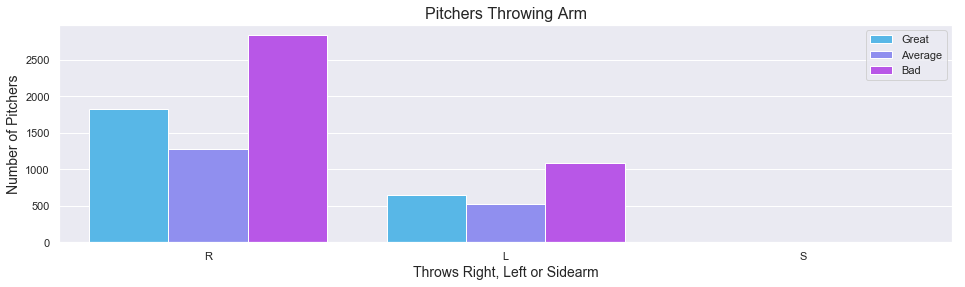

In [78]:
# Plot of the amount of right handed, left handed pitchers and sidearm pitchers
plt.figure(figsize=(16,4))
sns.countplot(x="throws", hue="CLASS", data=single_stint_df, palette="cool")
plt.xlabel("Throws Right, Left or Sidearm", fontsize=14)
plt.ylabel("Number of Pitchers", fontsize=14)
plt.title("Pitchers Throwing Arm", fontsize=16)
labels = ["Great", "Average", "Bad"]
plt.legend(labels)
plt.show()

From the plot above we can see that there are more bad pitchers that are right handed than bad ptichers that are left handed, this tells us that if we must have a bad pitcher, he better be left handed. We can also see that there are more bad pitchers than great ones overall, but most of the great pitchers are right handed. 

In [10]:
# One-hot encode categorical feature "throws"
single_stint_df = pd.get_dummies(single_stint_df, prefix = ["throws"], columns = ["throws"], dtype = int)

In [11]:
single_stint_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,weight,height,fullName,IP,ERA,WHIP,CLASS,throws_L,throws_R,throws_S
0,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,49,30,4,35,49,7,32,215.0,75.0,David Aardsma,48.67,5.55,1.73,3.0,0,1,0
1,accarje01,2008,1,TOR,AL,0,3,16,0,0,0,4,15,9,1,4,5,6,10,195.0,72.0,Jeremy Accardo,12.33,6.57,1.54,3.0,0,1,0
2,aceveal01,2008,1,NYA,AL,1,0,6,4,0,0,0,25,8,4,10,16,1,8,205.0,74.0,Alfredo Aceves,30.00,2.40,1.17,1.0,0,1,0
3,acostma01,2008,1,ATL,NL,3,5,46,0,0,0,3,48,21,7,26,31,22,25,215.0,76.0,Manny Acosta,53.00,3.57,1.40,3.0,0,1,0
4,adamsmi03,2008,1,SDN,NL,2,3,54,0,0,0,0,49,18,7,19,74,11,18,210.0,77.0,Mike Adams,65.33,2.48,1.04,1.0,0,1,0


In [12]:
# Convert floats that should be integers
single_stint_df["CLASS"] = single_stint_df["CLASS"].astype("int64")
single_stint_df["throws_L"] = single_stint_df["throws_L"].astype("int64")
single_stint_df["throws_R"] = single_stint_df["throws_R"].astype("int64")
single_stint_df["throws_S"] = single_stint_df["throws_S"].astype("int64")
single_stint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8195 entries, 0 to 8194
Data columns (total 29 columns):
playerID    8195 non-null object
yearID      8195 non-null int64
stint       8195 non-null int64
teamID      8195 non-null object
lgID        8195 non-null object
W           8195 non-null int64
L           8195 non-null int64
G           8195 non-null int64
GS          8195 non-null int64
CG          8195 non-null int64
SHO         8195 non-null int64
SV          8195 non-null int64
H           8195 non-null int64
ER          8195 non-null int64
HR          8195 non-null int64
BB          8195 non-null int64
SO          8195 non-null int64
GF          8195 non-null int64
R           8195 non-null int64
weight      8195 non-null float64
height      8195 non-null float64
fullName    8195 non-null object
IP          8195 non-null float64
ERA         8195 non-null float64
WHIP        8195 non-null float64
CLASS       8195 non-null int64
throws_L    8195 non-null int64
throws_R    819

In [13]:
# Dropping features that won't be needed for modeling
model_data_1 = single_stint_df.drop(columns = ["playerID", "teamID", "lgID",
                                               "stint", "weight", "height",
                                               "WHIP", "fullName", "ERA"])
display(model_data_1.head())

print(model_data_1.shape)

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,CLASS,throws_L,throws_R,throws_S
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,48.67,3,0,1,0
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,12.33,3,0,1,0
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,30.00,1,0,1,0
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,53.00,3,0,1,0
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,65.33,1,0,1,0


(8195, 20)


In [14]:
# Saving model data to csv to avoid running the previous cells when reopening the notebook.
model_data_1.to_csv("model_data_1.csv", index = False)

In [2]:
model_data_1 = pd.read_csv("model_data_1.csv")
model_data_1.head()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,CLASS,throws_L,throws_R,throws_S
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,48.67,3,0,1,0
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,12.33,3,0,1,0
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,30.00,1,0,1,0
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,53.00,3,0,1,0
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,65.33,1,0,1,0


### 3 and 4. Model and Interpret
Here I will build my models and interpret the outcomes. 
I will be using:

**1. Logistic Regression(multiclass)**

**2. Random Forest**

**3. XGBoost**

Each will be evaluated by the following metrics:

**1. Accuracy:** This is the most intuitive metric and tells us how many pitchers were correctly labeled out of all the pitchers in the data set. 

**2. Precision:** This is the ratio of correctly labeled pitchers to the pitchers that are actually that label, in other words how many of the pitchers labeled good, average or bad are actually good, average or bad. This is how sure we are of our positives.

**3. Recall:** This tells us of all pitchers labeled 1, 2, or 3, how many did we correctly predict. This is how sure we are that we didn't miss any positives.

**4. F1-score:** This is the harmonic mean of the precision and recall. It considers both precision and recall and gives us the right balance of both.

Considering that my model is going to classify the performance of pitchers in order to help build a winning team, accuracy and precision will be the most important metrics for me. 

Since it is a multiclass problem it is better to be sure that pitchers are actually what they have been labeled as. 
It would be better for the team to have a good pitcher be labeled as a bad pitcher rather than a bad pitcher labeled as a good pitcher. The risk is higher with the former because the team could be using a lot of money for a bad result.

In [3]:
# Manually splitting data into Train and Test sets.
X_train = model_data_1[(model_data_1["yearID"] >= 2008) &
                       (model_data_1["yearID"] <= 2018)].reset_index(drop = True)

display(X_train.head())

print(X_train.shape)

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,CLASS,throws_L,throws_R,throws_S
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,48.67,3,0,1,0
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,12.33,3,0,1,0
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,30.00,1,0,1,0
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,53.00,3,0,1,0
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,65.33,1,0,1,0


(7410, 20)


In [4]:
# 2019 data will be used for validation
X_test = model_data_1[model_data_1["yearID"] == 2019].reset_index(drop = True)

display(X_test.head())

print(X_test.shape)

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,CLASS,throws_L,throws_R,throws_S
0,2019,0,2,21,0,0,0,0,9,6,2,3,9,1,6,13.00,1,1,0,0
1,2019,0,0,7,0,0,0,0,4,1,0,3,13,2,1,8.67,1,0,1,0
2,2019,3,0,23,0,0,0,0,15,7,1,10,18,2,8,21.67,1,0,1,0
3,2019,0,0,15,0,0,0,0,18,13,4,13,14,9,13,16.67,3,0,1,0
4,2019,1,1,13,0,0,0,1,39,24,7,11,23,5,25,25.33,3,0,1,0


(785, 20)


In [5]:
# Defining our labels for modeling.
y_train = X_train["CLASS"]

display(y_train.head())

print(y_train.shape)

0    3
1    3
2    1
3    3
4    1
Name: CLASS, dtype: int64

(7410,)


In [6]:
y_test = X_test["CLASS"]

display(y_test.head())

print(y_test.shape)

0    1
1    1
2    1
3    3
4    3
Name: CLASS, dtype: int64

(785,)


In [7]:
# Drop labels from train and test sets
X_train = X_train.drop(columns = ["CLASS"])
X_train.head()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,throws_L,throws_R,throws_S
0,2008,4,2,47,0,0,0,0,49,30,4,35,49,7,32,48.67,0,1,0
1,2008,0,3,16,0,0,0,4,15,9,1,4,5,6,10,12.33,0,1,0
2,2008,1,0,6,4,0,0,0,25,8,4,10,16,1,8,30.00,0,1,0
3,2008,3,5,46,0,0,0,3,48,21,7,26,31,22,25,53.00,0,1,0
4,2008,2,3,54,0,0,0,0,49,18,7,19,74,11,18,65.33,0,1,0


In [8]:
# I don't need the year column for modeling.
X_train = X_train.drop(columns=["yearID"])
X_train.head()

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,throws_L,throws_R,throws_S
0,4,2,47,0,0,0,0,49,30,4,35,49,7,32,48.67,0,1,0
1,0,3,16,0,0,0,4,15,9,1,4,5,6,10,12.33,0,1,0
2,1,0,6,4,0,0,0,25,8,4,10,16,1,8,30.00,0,1,0
3,3,5,46,0,0,0,3,48,21,7,26,31,22,25,53.00,0,1,0
4,2,3,54,0,0,0,0,49,18,7,19,74,11,18,65.33,0,1,0


In [9]:
X_test = X_test.drop(columns=["yearID", "CLASS"])
X_test.head()

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,throws_L,throws_R,throws_S
0,0,2,21,0,0,0,0,9,6,2,3,9,1,6,13.00,1,0,0
1,0,0,7,0,0,0,0,4,1,0,3,13,2,1,8.67,0,1,0
2,3,0,23,0,0,0,0,15,7,1,10,18,2,8,21.67,0,1,0
3,0,0,15,0,0,0,0,18,13,4,13,14,9,13,16.67,0,1,0
4,1,1,13,0,0,0,1,39,24,7,11,23,5,25,25.33,0,1,0


In [10]:
# Check to see if data needs to be rescaled.
model_data_1.describe()

,yearID,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,CLASS,throws_L,throws_R,throws_S
count,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000,8195.000000
mean,2013.727395,3.552532,3.548627,28.782550,7.107138,0.162050,0.073337,1.804271,61.787065,29.000976,7.520561,22.343502,54.365711,6.905430,31.394265,63.434470,2.176815,0.275046,0.724466,0.000488
std,3.482110,4.223095,3.717662,21.507945,11.066918,0.633535,0.337785,6.630674,57.540911,26.316835,7.470970,19.103498,52.480298,10.841164,28.447656,59.047597,0.865553,0.446565,0.446810,0.022089
min,2008.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.330000,1.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,18.000000,10.000000,2.000000,8.000000,14.000000,0.000000,10.000000,17.670000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,2.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,44.000000,20.000000,5.000000,17.000000,39.000000,3.000000,22.000000,47.670000,2.000000,0.000000,1.000000,0.000000
75%,2017.000000,5.000000,5.000000,41.000000,11.000000,0.000000,0.000000,0.000000,80.000000,39.000000,10.000000,31.000000,75.000000,9.000000,42.000000,78.670000,3.000000,1.000000,1.000000,0.000000
max,2019.000000,24.000000,19.000000,92.000000,35.000000,11.000000,6.000000,62.000000,262.000000,121.000000,46.000000,105.000000,326.000000,71.000000,129.000000,253.000000,3.000000,1.000000,1.000000,1.000000


In [11]:
scaler = StandardScaler()

# Transforming data
train_data_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(X_test)

# Back into Dataframe
scaled_train_df = pd.DataFrame(train_data_scaled, columns= X_train.columns)
scaled_train_df.head()

,W,L,G,GS,CG,SHO,SV,H,ER,HR,BB,SO,GF,R,IP,throws_L,throws_R,throws_S
0,0.093704,-0.426452,0.835651,-0.646500,-0.263031,-0.222364,-0.271858,-0.235045,0.031870,-0.462111,0.643156,-0.102544,0.000675,0.015032,-0.262230,-0.618019,0.618644,-0.020125
1,-0.846829,-0.159492,-0.599899,-0.646500,-0.263031,-0.222364,0.320371,-0.819250,-0.760471,-0.868999,-0.961643,-0.944189,-0.090280,-0.752919,-0.871528,-0.618019,0.618644,-0.020125
2,-0.611696,-0.960372,-1.062980,-0.287602,-0.263031,-0.222364,-0.271858,-0.647425,-0.798202,-0.462111,-0.651037,-0.733778,-0.545053,-0.822733,-0.575263,-0.618019,0.618644,-0.020125
3,-0.141429,0.374429,0.789343,-0.646500,-0.263031,-0.222364,0.172314,-0.252228,-0.307705,-0.055222,0.177247,-0.446853,1.364994,-0.229316,-0.189631,-0.618019,0.618644,-0.020125
4,-0.376562,-0.159492,1.159808,-0.646500,-0.263031,-0.222364,-0.271858,-0.235045,-0.420897,-0.055222,-0.185127,0.375663,0.364494,-0.473664,0.017101,-0.618019,0.618644,-0.020125


### Logistic Regression

In [12]:
# Packages needed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, accuracy_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             auc, roc_curve, roc_auc_score)

In [13]:
# Build baseline model
LR_clf = LogisticRegression(random_state = 123, multi_class = "multinomial",
                            solver = "newton-cg")

LR_clf.fit(train_data_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# Predictions
LR_train_preds = LR_clf.predict(train_data_scaled)
LR_test_preds = LR_clf.predict(test_data_scaled)

train_acc = accuracy_score(y_train, LR_train_preds)
test_acc = accuracy_score(y_test, LR_test_preds)

print("Train Accuracy: {:.4}%".format(train_acc * 100))
print("Test Accuracy: {:.4}%".format(test_acc * 100))

Train Accuracy: 90.0%
Test Accuracy: 88.66%


Not bad for a baseline model. The closeness in the accuracy scores indicates that model has a pretty good fit.

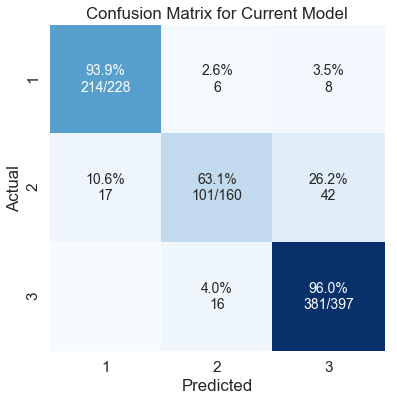

In [29]:
# Function for visualizing Confusion Matricies
# Takes actual labels, predicted labels
def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), 
                      columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='',
                ax=ax, cbar=False, annot_kws={"size": 14})
    plt.title("Confusion Matrix for Current Model")
    
plot_cm(y_test, LR_test_preds)

In [15]:
# Precision, recall, and f1-score for LR model.
print("Evaluation metrics for Logistic Regression model: \n")
print("=======================================================")
print(classification_report(y_test, LR_test_preds))

Evaluation metrics for Logistic Regression model: 

              precision    recall  f1-score   support

           1       0.93      0.94      0.93       228
           2       0.82      0.63      0.71       160
           3       0.88      0.96      0.92       397

   micro avg       0.89      0.89      0.89       785
   macro avg       0.88      0.84      0.86       785
weighted avg       0.88      0.89      0.88       785



This model is better at labeling the Great and Bad classes than the Average class. 

The accuracy score shows that 89% of the model predictions are correct.

1. Precision for class 1 tells us that for every 10 pitchers labeled Great, 9.3 are actually Great. 
2. Precision for class 2 tells us that for every 10 pitchers labeled Average, 8.2 are acutally Average.
3. Precision for class 3 tells us that for every 10 pitchers labeled Bad, 8.8 are actually Bad.

### Random Forest(ensemble method)

In [30]:
# Build RandomForest model.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [31]:
RF_clf = RandomForestClassifier(criterion = "entropy")
RF_clf.fit(train_data_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
RF_train_preds = RF_clf.predict(train_data_scaled)
RF_test_preds = RF_clf.predict(test_data_scaled)

RF_train_acc = RF_clf.score(train_data_scaled, y_train)
RF_test_acc = RF_clf.score(test_data_scaled, y_test)

print("Train Accuracy: {:.4}%".format(RF_train_acc * 100))
print("Test Accuracy: {:.4}%".format(RF_test_acc * 100))

Train Accuracy: 99.26%
Test Accuracy: 74.52%


The baseline Random Forest model did not perform as well as my Logistic Regression model did. It looks like it overfit on the training data but performs better on the test set with 75% of the predictions being correct.

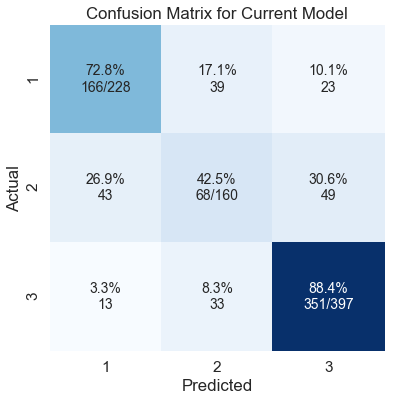

In [35]:
# Confusion Matrix for RF
plot_cm(y_test, RF_test_preds)

In [33]:
print("Evaluation metrics for RandomForest model: \n")
print("=======================================================")
print(classification_report(y_test, RF_test_preds))

Evaluation metrics for RandomForest model: 

              precision    recall  f1-score   support

           1       0.75      0.73      0.74       228
           2       0.49      0.42      0.45       160
           3       0.83      0.88      0.86       397

   micro avg       0.75      0.75      0.75       785
   macro avg       0.69      0.68      0.68       785
weighted avg       0.74      0.75      0.74       785



Now I will perform a grid search on this model to find optimal parameters to improve the performance of my model.

In [34]:
# Run GridSearch in order to improve performance
RF_param_grid = {
    "n_estimators" : [50, 100, 250],
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 5, 10, 50],
    "min_samples_split" : [5, 10],
    "min_samples_leaf" : [3, 6],
    }

In [36]:
RF_gridSearch = GridSearchCV(RF_clf, RF_param_grid, cv = 5, return_train_score = True)
RF_gridSearch.fit(scaled_train_df, y_train)


print(f"Testing Accuracy: {RF_gridSearch.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {RF_gridSearch.best_params_}")

Testing Accuracy: 77.23%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 250}


In [37]:
# Run model once again with optimized parameters
RF_clf2 = RandomForestClassifier(criterion = "entropy",
                                 max_depth = 50, 
                                 min_samples_leaf = 3, 
                                 min_samples_split = 5, 
                                 n_estimators = 250,
                                 random_state = 122)

RF_clf2.fit(train_data_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=122, verbose=0, warm_start=False)

In [38]:
RF2_train_preds = RF_clf2.predict(train_data_scaled)
RF2_test_preds = RF_clf2.predict(test_data_scaled)

RF2_train_acc = RF_clf2.score(train_data_scaled, y_train)
RF2_test_acc = RF_clf2.score(test_data_scaled, y_test)

print("Train Accuracy: {:.4}%".format(RF2_train_acc * 100))
print("Test Accuracy: {:.4}%".format(RF2_test_acc * 100))

Train Accuracy: 97.23%
Test Accuracy: 77.58%


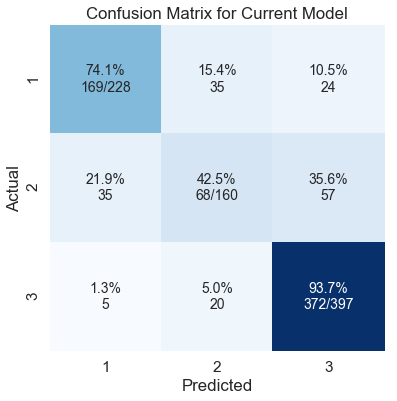

In [39]:
# Confusion Matrix for Optimized(GridSearchCV) Random Forest Model
plot_cm(y_test, RF2_test_preds)

In [42]:
print("Evaluation metrics for RandomForest model: \n")
print("=======================================================")
print(classification_report(y_test, RF2_test_preds))

Evaluation metrics for RandomForest model: 

              precision    recall  f1-score   support

           1       0.81      0.74      0.77       228
           2       0.55      0.42      0.48       160
           3       0.82      0.94      0.88       397

   micro avg       0.78      0.78      0.78       785
   macro avg       0.73      0.70      0.71       785
weighted avg       0.76      0.78      0.77       785



There is an improvement of about 3% in the accuracy of my model, but it still shows weakness in predicting the average class. This could be due to some class inbalance, there are more Great and Bad players than there are average ones.

This model seems to perform well when it comes to class 3, we can tell by the high recall score of .94. 

Below are the features ranked by importance to the model.

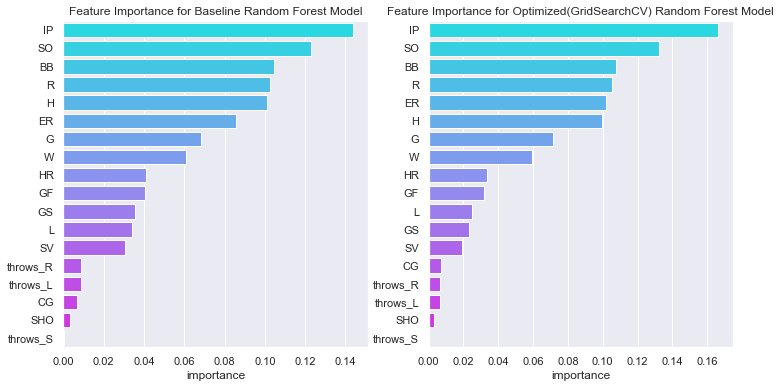

In [45]:
# Important features for the RF model.
feature_importances_1 = pd.DataFrame(RF_clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)

feature_importances_2 = pd.DataFrame(RF_clf2.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)


plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
plt.subplot(1, 2, 1)
sns.barplot(x = feature_importances_1["importance"], 
            y = feature_importances_1.index, palette = "cool");
plt.title("Feature Importance for Baseline Random Forest Model")

plt.subplot(1, 2, 2)
sns.barplot(x = feature_importances_2["importance"], 
            y = feature_importances_2.index, palette = "cool");
plt.title("Feature Importance for Optimized(GridSearchCV) Random Forest Model")
plt.show()

The most influential features in this classification are **IP(innings pitched)** and **SO(strikeouts)**. It is important for a pitcher to be in as many innings as possible, as well as striking out a lot of batters. What is interesting is that HR(Home Runs) don't seem to hurt a pitchers performance as much as a Walk. This goes along with the importance of a strikeout, if a pitcher doesn't strikeout a batter than he either got a Hit(H) or Walk(BB), which is basically giving the batter the base. 

### XGBoost Classifier

In [46]:
# Build XGBoost model with scaled data
import xgboost as xgb

In [47]:
# Instantiate XGBoost Classifier
XGB_clf = xgb.XGBClassifier(random_state = 123)
XGB_clf.fit(train_data_scaled, y_train)

# Predictions
training_preds = XGB_clf.predict(train_data_scaled)
test_preds = XGB_clf.predict(test_data_scaled)

# Performance of model
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("---------------------------------------------------------")
print("Validation accuracy: {:.4}%".format(test_accuracy * 100))

Training Accuracy: 78.5%
---------------------------------------------------------
Validation accuracy: 76.18%


The XGBoost classifier has definitely improved on the overfitting of the previous Random Forest model, but has about the same overall performance with an accuracy score of 76%. I'm going to run this model again using Grid Search.

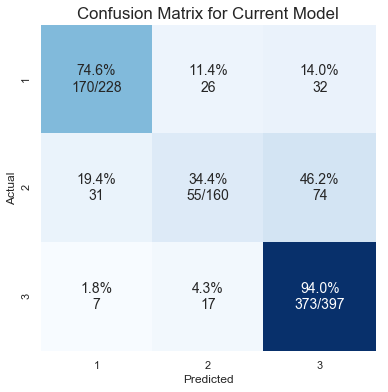

In [48]:
# Confusion Matrix for baseline XGBoost model
plot_cm(y_test, test_preds)

In [50]:
print("Evaluation metrics for Baseline XGBoost model: \n")
print("=======================================================")
print(classification_report(y_test, test_preds))

Evaluation metrics for Baseline XGBoost model: 

              precision    recall  f1-score   support

           1       0.82      0.75      0.78       228
           2       0.56      0.34      0.43       160
           3       0.78      0.94      0.85       397

   micro avg       0.76      0.76      0.76       785
   macro avg       0.72      0.68      0.69       785
weighted avg       0.75      0.76      0.74       785



In [51]:
# GridSearch for XGBoost
XGB_param_grid = {
    "learning_rate": [0.1, 0.3, 0.5],
    'max_depth': [5, 10, 20],
    'min_child_weight': [5, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [52]:
XGB_grid_clf = GridSearchCV(XGB_clf, XGB_param_grid, scoring = "accuracy", cv = 3, n_jobs = 1)
XGB_grid_clf.fit(train_data_scaled, y_train)

best_parameters_XGB = XGB_grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters_XGB.keys()):
    print("%s: %r" % (param_name, best_parameters_XGB[param_name]))

XGB_train_preds = XGB_grid_clf.predict(train_data_scaled)
XGB_test_preds = XGB_grid_clf.predict(test_data_scaled)

training_acc_XGB = accuracy_score(y_train, XGB_train_preds)
test_acc_XGB = accuracy_score(y_test, XGB_test_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_acc_XGB * 100))
print("Validation accuracy: {:.4}%".format(test_acc_XGB * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.5
max_depth: 5
min_child_weight: 5
n_estimators: 250
subsample: 0.7

Training Accuracy: 100.0%
Validation accuracy: 90.32%


In [53]:
# Build another XGBoost with optimal paramters
XGB_clf2 = xgb.XGBClassifier(max_depth = 5,
                             learning_rate = 0.5, 
                             n_estimators = 250,
                             subsample = 0.7, 
                             min_child_weight = 5,
                             random_state = 123)

XGB_clf2.fit(X_train, y_train)

# Predictions
training_preds_XGB = XGB_clf2.predict(X_train)
test_preds_XGB = XGB_clf2.predict(X_test)

# Performance of model
training_accuracy_XGB = accuracy_score(y_train, training_preds_XGB)
test_accuracy_XGB = accuracy_score(y_test, test_preds_XGB)

print("Training Accuracy: {:.4}%".format(training_accuracy_XGB * 100))
print("=========================================================")
print("Validation accuracy: {:.4}%".format(test_accuracy_XGB * 100))

Training Accuracy: 99.99%
Validation accuracy: 89.94%


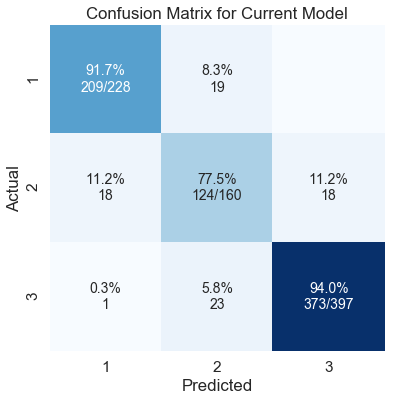

In [54]:
# Confusion matrix for Optimized(GridSearchCV) XGBoost model
plot_cm(y_test, test_preds_XGB)

In [56]:
print("Evaluation metrics for Optimized(GridSearchCV) XGBoost model: \n")
print("=======================================================")
print(classification_report(y_test, test_preds_XGB))

Evaluation metrics for Optimized(GridSearchCV) XGBoost model: 

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       228
           2       0.75      0.78      0.76       160
           3       0.95      0.94      0.95       397

   micro avg       0.90      0.90      0.90       785
   macro avg       0.87      0.88      0.87       785
weighted avg       0.90      0.90      0.90       785



Optimizing a model has it's benefits, improvement across the board with the new parameters. Still shows strength in predicting Great and Bad pitchers, but improved the prediction of the Average class. The "not so great part" of building this model was the run time, which was nearly an hour. My baseline Logistic Regression model performed just as well as the XGBoost model and in a lot less time. 

**LR Model**
* Training Accuracy: 90.0%
* Testing Accuracy: 88.66%

**XGBoost Model**
* Training Accuracy: 99.99%
* Testing Accuracy: 89.94%

The LR model seems to have less overfitting and was less computationally complex.

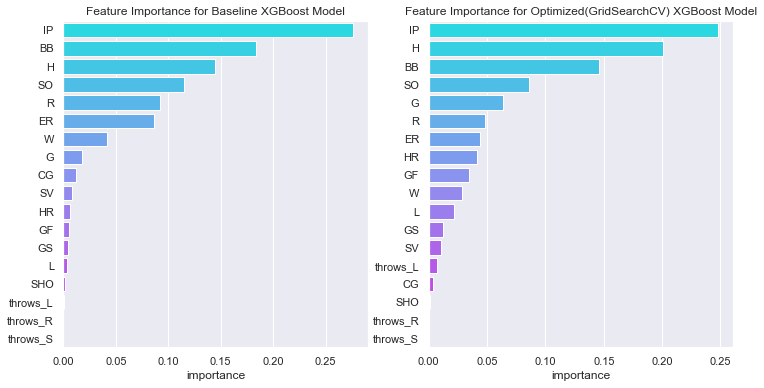

In [58]:
# Feature importance for XGB models
feature_importances_XGB = pd.DataFrame(XGB_clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)

feature_importances_GSxgb = pd.DataFrame(XGB_clf2.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)


plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
plt.subplot(1, 2, 1)
sns.barplot(x = feature_importances_XGB["importance"], 
            y = feature_importances_XGB.index, palette = "cool");
plt.title("Feature Importance for Baseline XGBoost Model")

plt.subplot(1, 2, 2)
sns.barplot(x = feature_importances_GSxgb["importance"], 
            y = feature_importances_GSxgb.index, palette = "cool");
plt.title("Feature Importance for Optimized(GridSearchCV) XGBoost Model")
plt.show()

For this model IP is still the most important, but "SO" has fallen in rank. 

## Summary

After building three different classification models, it seems that the Logistic Regression classifier performed the best overall and was not as computationally complex as the other two models, as well as not showing much overfitting to the Training Data. There could be some class inbalance and is definitely worth some further data scrubbing and optimization to see if a better model can be built.

**LR Model**
* Training Accuracy: 90.0%
* Testing Accuracy: 88.66%

* Precision Class 1: 93%
* Precision Class 2: 82%
* Precision Class 3: 88%

**Random Forest**
* Training Accuracy: 97.23%
* Testing Accuracy: 77.58%

* Precision Class 1: 81%
* Precision Class 2: 55%
* Precision Class 3: 82%

**XGBoost Model**
* Training Accuracy: 99.99%
* Testing Accuracy: 89.94%

* Precision Class 1: 92%
* Precision Class 2: 75%
* Precision Class 3: 95%

## Conclusion

The best model to take to the team would be the Logistic Regression classifier as it has better overall performance and is not too used to the training data. Important stats to keep in mind when making decisions about acquiring new pitchers are "innings pitched(IP)" and "strikeouts(SO)". The more he pitches the more chance he has of getting strikeouts, which will improve his performance and make him appealing to many teams.

To help avoid taking on a bad pitcher look for left handers, there are fewer bad left handed pitchers than bad right handed pitchers.

Finally, look for young pitchers, it gives the team a chance to train the pitcher in certain areas to improve his performance, much like we do in building these models. 

## Future Work

-  I will look into possibly dropping the features that have a lot of importance to see how it affects the models. 
-  Further investigation into how salaries can also help a team decide who to take on.
-  More research into the different stats that player has and how influential they are on a player's value. 